In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('wellness_business_dataset.csv')
dataset.head()

,Sales_Amount,Customer_Age,Transaction_Count,Product_Category,Region,Repeat_Customer,Income_Level,Customer_Lifetime_Value,Annual_Spend,Average_Discount_Utilized,Session_Duration_Minutes,Page_Views_per_Session,Ad_Clicks_per_Session,Products_Viewed_per_Session,Subscription_Status
0,109.934283,26,7,B,East,Yes,Low,12483.570770,2331.979201,21.721913,28.158542,4,6,1,Not_Subscribed
1,97.234714,62,3,B,North,Yes,Medium,9308.678494,797.044299,24.966395,18.698213,4,2,5,Not_Subscribed
2,112.953771,26,6,B,East,No,Medium,13238.442690,2069.692403,28.318823,32.730107,5,0,6,Subscribed
3,130.460597,43,2,C,North,No,Medium,17615.149280,999.491445,5.503446,9.253600,5,0,5,Not_Subscribed
4,95.316933,21,4,A,East,No,Low,8829.233126,4137.058445,8.844593,29.080432,6,2,2,Not_Subscribed


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sales_Amount                 1901 non-null   float64
 1   Customer_Age                 2000 non-null   int64  
 2   Transaction_Count            2000 non-null   int64  
 3   Product_Category             2000 non-null   object 
 4   Region                       2000 non-null   object 
 5   Repeat_Customer              2000 non-null   object 
 6   Income_Level                 2000 non-null   object 
 7   Customer_Lifetime_Value      1900 non-null   float64
 8   Annual_Spend                 2000 non-null   float64
 9   Average_Discount_Utilized    2000 non-null   float64
 10  Session_Duration_Minutes     2000 non-null   float64
 11  Page_Views_per_Session       2000 non-null   int64  
 12  Ad_Clicks_per_Session        2000 non-null   int64  
 13  Products_Viewed_pe

Text(0, 0.5, 'Frequency')

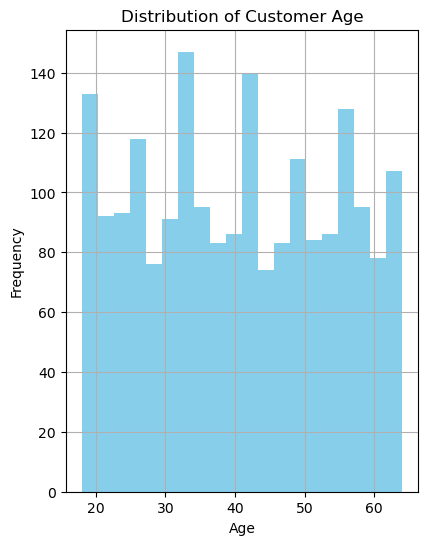

In [4]:
# Data Visualization
# Histograms for Customer Age and Session Duration Minutes
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
dataset['Customer_Age'].hist(bins=20, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'People'),
 Text(0.5, 1.0, 'Customer Age Histogram')]

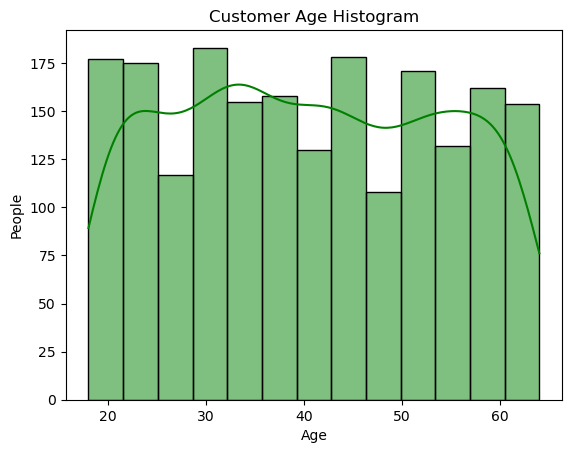

In [5]:
ax = sns.histplot(dataset['Customer_Age'], kde=True, color ='green')
ax.set(xlabel='Age', ylabel='People', title ='Customer Age Histogram')

[Text(0.5, 0, 'Amount'),
 Text(0, 0.5, 'Transactions'),
 Text(0.5, 1.0, 'Sales Histogram')]

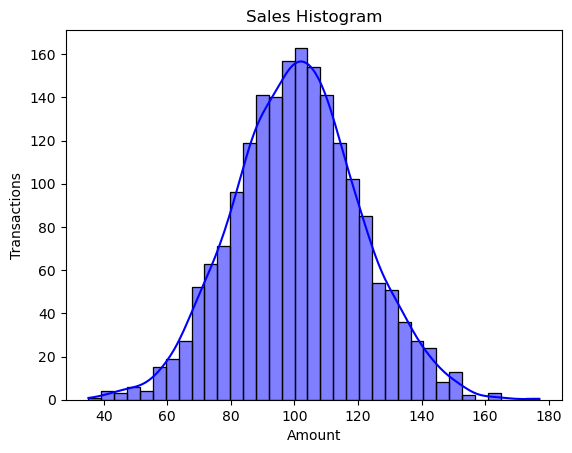

In [6]:
ax = sns.histplot(dataset['Sales_Amount'], kde=True, color ='blue')
ax.set(xlabel='Amount', ylabel='Transactions', title ='Sales Histogram')

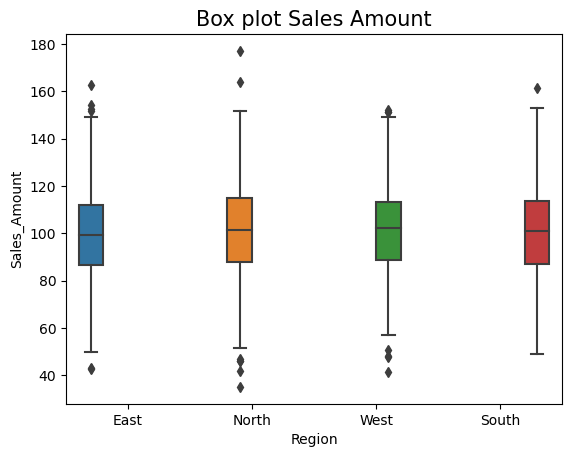

In [7]:
sns.boxplot(x = 'Region', y ='Sales_Amount', data=dataset, hue = 'Region')
plt.title('Box plot Sales Amount', fontsize=15)
plt.legend([], [], frameon=False)
plt.show()

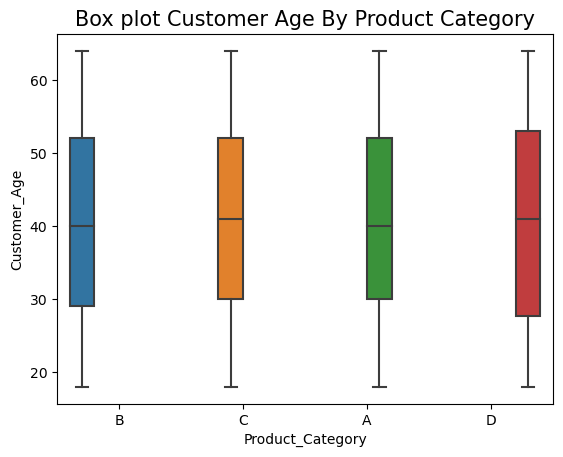

In [8]:
sns.boxplot(x = 'Product_Category', y ='Customer_Age', data=dataset, hue = 'Product_Category')
plt.title('Box plot Customer Age By Product Category', fontsize=15)
plt.legend([], [], frameon=False)
plt.show()

In [9]:
#Pie chart sales per category

total_sales_by_category = dataset.groupby('Product_Category')['Sales_Amount'].sum()

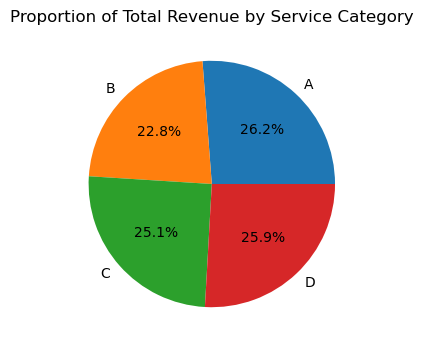

In [10]:
# Generate a pie chart for the proportion of total revenue generated from each service category
plt.figure(figsize=(4, 4))
plt.pie(total_sales_by_category, labels=total_sales_by_category.index, autopct='%1.1f%%')
plt.title('Proportion of Total Revenue by Service Category')
plt.show()

Text(0.5, 1.0, 'Sales Amount - By Income')

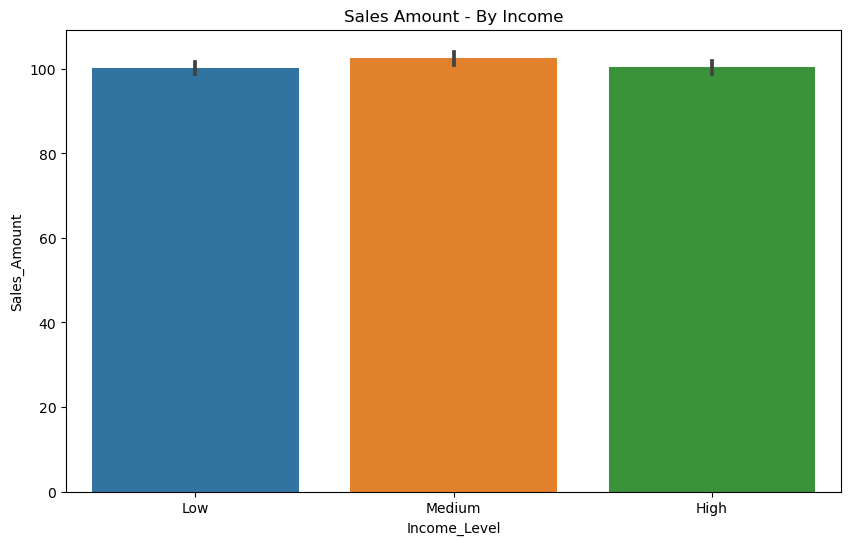

In [11]:
#Graph of Sales according to Income

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Income_Level", y="Sales_Amount", data=dataset)
plt.title('Sales Amount - By Income')

In [12]:
# Calculate average Sales_Amount for Income_Level
avg_sales_by_income_level = dataset.groupby('Income_Level')['Sales_Amount'].mean().reset_index()


In [13]:
#Pie chart To check Repeated Customer Percentages

value_counts = dataset['Repeat_Customer'].value_counts()
relative_frequencies = value_counts/len(dataset) #length

relative_frequencies

Repeat_Customer
No     0.5055
Yes    0.4945
Name: count, dtype: float64

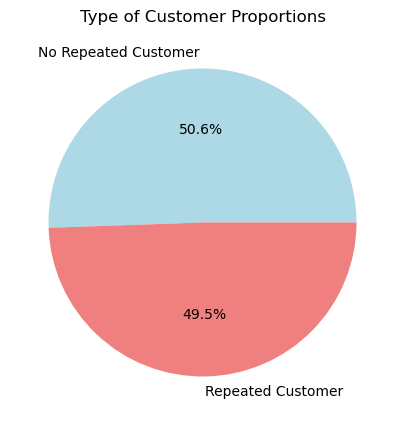

In [14]:
# Preparing the data
subscription_proportions = {'No Repeated Customer': 0.5055, 'Repeated Customer': 0.4945}

# Labels and values for the pie chart
labels = subscription_proportions.keys()
sizes = subscription_proportions.values()

# Plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Type of Customer Proportions')
plt.show()